In [1]:
# Clone this repository to bring data to your virtual machine
!git clone https://github.com/sagihaider/CE888_2020.git

Cloning into 'CE888_2020'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 25162 (delta 36), reused 4 (delta 0), pack-reused 25082
Receiving objects: 100% (25162/25162), 562.19 MiB | 16.47 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [2]:
# Unzip the data from the zipped file
from zipfile import ZipFile
file_name = "/content/CE888_2020/Lab_8/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

     |████████████████████████████████| 43.6MB 70kB/s 
     |████████████████████████████████| 1.6MB 49.7MB/s 
     |████████████████████████████████| 890kB 56.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=cb78ba27293794eaa82a57542d4aff0ccf91fc94d534f71739ec403ff4d030fb
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.3.0 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.3.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorflow 1.15.0
    Uninst

In [4]:

import numpy as np
import os
import time
from CE888_2020.Lab_8.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

In [5]:
os.environ['KAGGLE_USERNAME'] = "nomanshafqat" # username from the json file
os.environ['KAGGLE_KEY'] = "a22e8cc322683d0d4d4d3e2ad7121b66" # key from the json file

!kaggle datasets download vitorgamalemos/cellphone

 85% 5.00M/5.87M [00:00<00:00, 9.08MB/s]
100% 5.87M/5.87M [00:00<00:00, 10.0MB/s]


In [6]:
!unzip cellphone.zip

Archive:  cellphone.zip
  inflating: test_samples/test_samples/0.jpg  
  inflating: test_samples/test_samples/1.jpg  
  inflating: test_samples/test_samples/10.jpg  
  inflating: test_samples/test_samples/11.jpg  
  inflating: test_samples/test_samples/12.jpg  
  inflating: test_samples/test_samples/13.jpg  
  inflating: test_samples/test_samples/14.jpg  
  inflating: test_samples/test_samples/15.jpg  
  inflating: test_samples/test_samples/16.jpg  
  inflating: test_samples/test_samples/17.jpg  
  inflating: test_samples/test_samples/18.jpg  
  inflating: test_samples/test_samples/20.jpg  
  inflating: test_samples/test_samples/22.jpg  
  inflating: test_samples/test_samples/23.jpg  
  inflating: test_samples/test_samples/24.jpg  
  inflating: test_samples/test_samples/25.jpg  
  inflating: test_samples/test_samples/26.jpg  
  inflating: test_samples/test_samples/27.jpg  
  inflating: test_samples/test_samples/29.jpg  
  inflating: test_samples/test_samples/3.jpg  
  inflating: test_s

In [7]:
!ls training/training

cellphone-NO  cellphone-YES


In [8]:
import os
data_path="training/training"
classes=os.listdir(data_path)
img_data_list=[] # created an empty list for images to be loaded
labels=[]
for i,clas in enumerate(classes):
	class_path=os.path.join(data_path,clas)
	for images_name in os.listdir(class_path):
		image_path=os.path.join(class_path,images_name)
		print(image_path)
		img = image.load_img(image_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		#x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)
		labels.append(i)

#%% 
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

training/training/cellphone-NO/img114.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img32.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img61.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img94.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img2.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img84.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img75.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img7.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img60.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img36.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img29.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img45.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img101.png
Input image shape: (1, 224, 224, 3)

In [9]:
# Define the number of classes
num_classes = 2
print(img_data.shape[0])

# labels[0:202]=0
# labels[202:404]=1
# labels[404:606]=2
# labels[606:]=3

names = classes

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


245


In [10]:
#%% Fine Tuning

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()

552542208/553467096 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (M

In [11]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
	layer.trainable = False

custom_vgg_model2.summary()

custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [13]:
t=time.time()
#	t = now()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=4, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 196 samples, validate on 49 samples
Epoch 1/4
196/196 [==============================] - 345s - loss: 1.6016 - acc: 0.7296 - val_loss: 0.4191 - val_acc: 0.8776
Epoch 2/4
196/196 [==============================] - 343s - loss: 0.1985 - acc: 0.9643 - val_loss: 0.2422 - val_acc: 0.9184
Epoch 3/4
196/196 [==============================] - 342s - loss: 0.1044 - acc: 0.9847 - val_loss: 0.1205 - val_acc: 0.9592
Epoch 4/4
196/196 [==============================] - 342s - loss: 0.0831 - acc: 0.9949 - val_loss: 0.1259 - val_acc: 0.9592
Training time: -1374.9803457260132
49/49 [==============================] - 68s     
[INFO] loss=0.1259, accuracy: 95.9184%


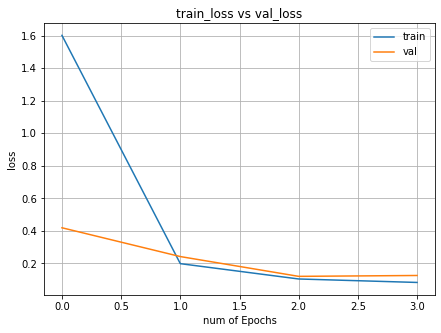

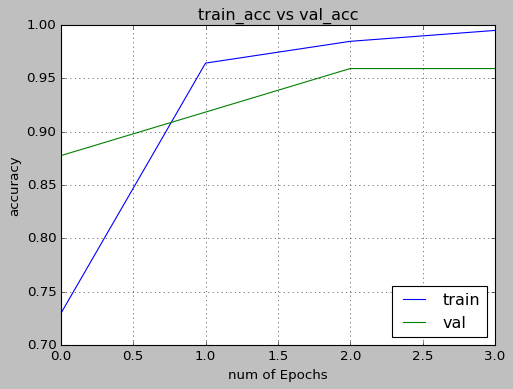

In [14]:
#%% plot
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(4)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])